In [1]:
import pandas as pd
import os   
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the path to the size_points folder
pixel_size_regions_path = "size_points"
pixel_size_list_only_size = []

# Loop through all files in the size_points folder
for filename in os.listdir(pixel_size_regions_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(pixel_size_regions_path, filename)
        # Read the CSV file into a DataFrame
        # print(f"Reading file: {file_path}")
        df = pd.read_csv(file_path, sep=";")
        # extract the "object pixels" column and add them to pixel_size_list_only_size but only those that have not been added yet
        for size in df["Object pixels"]:
            if size not in pixel_size_list_only_size:
                pixel_size_list_only_size.append(size)
                


# sort values by size
pixel_size_list_only_size.sort()
       
print(pixel_size_list_only_size)              
           
                  
            
       
        



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 124, 126, 127, 128, 129, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 144, 145, 146, 147, 148, 150, 151, 153, 155, 158, 160, 161, 168, 169, 172, 175, 176, 177, 186, 191, 198, 203, 205, 209, 212, 218, 223, 225, 236, 242, 248, 250, 251, 264, 283, 307, 324, 337, 348, 349, 363, 494, 519, 579, 706, 757, 783]


In [3]:
# transform pixel_size_list_only_size into a df to have a second column with the amount of pixels having that size
pixel_size_df = pd.DataFrame(pixel_size_list_only_size, columns=["Object pixels"])
# add a second column with the amount of pixels having that size
pixel_size_df["Amount"] = pixel_size_df["Object pixels"]

# loop through all files in the size_points folder again to count the amount of pixels having that size
for filename in os.listdir(pixel_size_regions_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(pixel_size_regions_path, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, sep=";")
        # count the amount of pixels having that size and add it to the pixel_size_df
        for size in df["Object pixels"]:
            pixel_size_df.loc[pixel_size_df["Object pixels"] == size, "Amount"] += 1
# what does .loc do?
# .loc is used to access a group of rows and columns by labels or a boolean array
print(pixel_size_df)

KeyboardInterrupt: 

In [16]:
# save pixel_size_df to a csv file with ; as separator
pixel_size_df.to_csv("pixel_size_df.csv", sep=";", index=False)


In [4]:
pixel_size_df = pd.read_csv("pixel_size_df.csv", sep=";")

Text(0, 0.5, 'Amount')

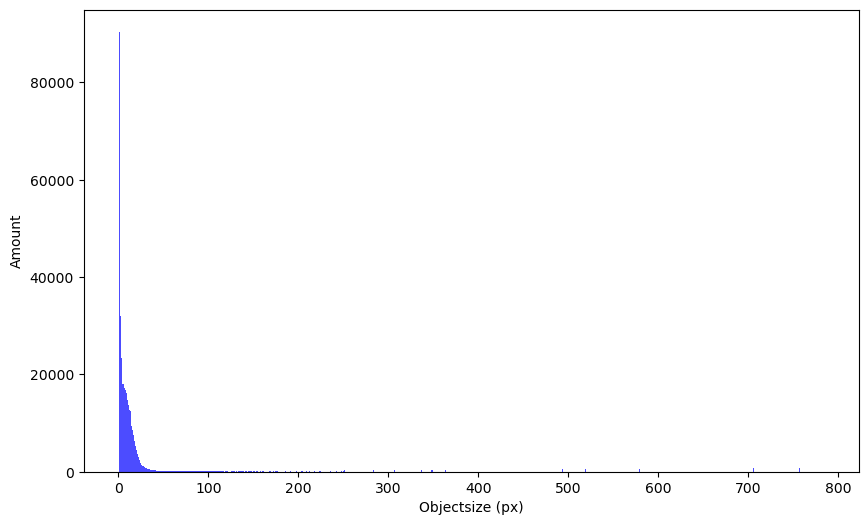

In [5]:
import matplotlib.pyplot as plt
# plot pixel_size_df as a histogram with the amount on the y-axis and the object pixels on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(pixel_size_df["Object pixels"], pixel_size_df["Amount"], width=1.0, color='blue', alpha=0.7)
plt.xlabel("Objectsize (px)") 
plt.ylabel("Amount")


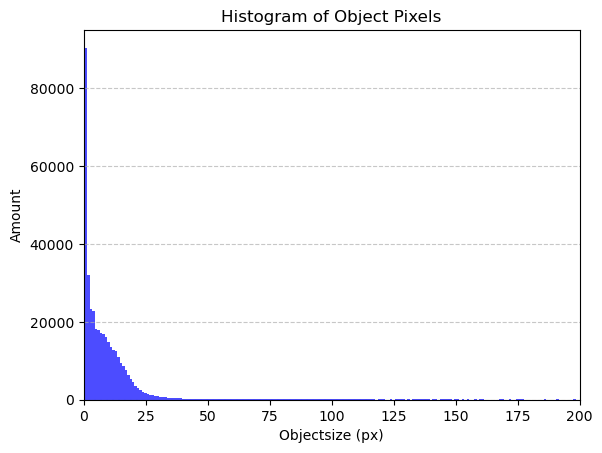

In [7]:
# plot the same plot but only for object pixel below 200
plt.xlim(0, 200)
plt.title("Histogram of Object Pixels") 
plt.xlabel("Objectsize (px)") 
plt.ylabel("Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(pixel_size_df["Object pixels"], pixel_size_df["Amount"], width=1.0, color='blue', alpha=0.7)
plt.show()



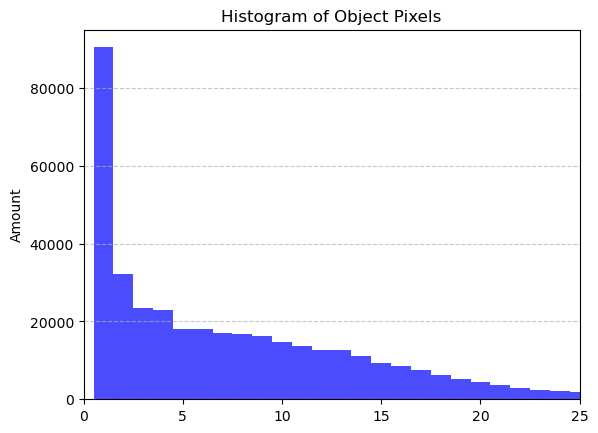

In [23]:
# again the same plot but for object pixels below 25
plt.xlim(0, 25)
plt.title("Histogram of Object Pixels") 
plt.ylabel("Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(pixel_size_df["Object pixels"], pixel_size_df["Amount"], width=1.0, color='blue', alpha=0.7)
plt.show()
